# **APRENDIZAGEM NÃO SUPERVISIONADA: AGRUPAMENTO**

Este projeto tem por objetivo desenvolver um algoritmo de Machine Learning para agrupar clientes de um shopping.

Os dados foram extraídos do site do Kaggle:

https://www.kaggle.com/shwetabh123/mall-customers

In [27]:
import numpy as np
import pandas as pd

In [28]:
import warnings
warnings.filterwarnings("ignore")

In [29]:
df = pd.read_csv('Mall_Customers.csv')

In [30]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


**IDADE**

In [31]:
import plotly.express as px

In [32]:
hist = px.histogram(df, x='Age', nbins=60)
hist.update_layout(width=600,height=400,title_text='Distribuição das idades')
hist.show()

**GÊNERO**

In [33]:
df['Genre'].value_counts()

Genre
Female    112
Male       88
Name: count, dtype: int64

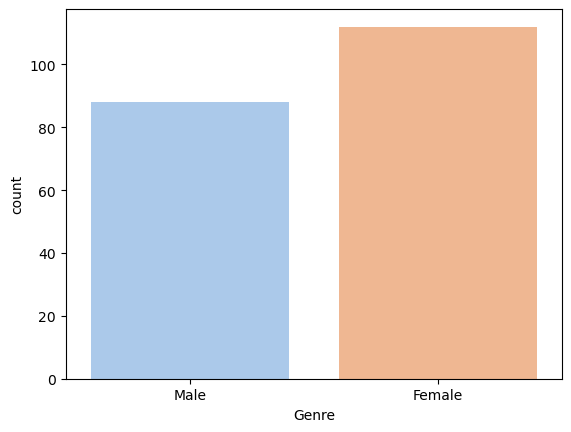

In [34]:
import seaborn as sns
sns.countplot(x='Genre', data=df, palette='pastel');

In [35]:
df.shape

(200, 5)

## **EXPLORAÇÃO E TRATAMENTO DOS DADOS**

In [36]:
df.rename(columns={'Genre': 'genero', 'Age': 'idade', 'Annual Income (k$)': 'renda_anual', 'Spending Score (1-100)': 'pontuacao'}, inplace=True)

In [37]:
df.head(3)

,CustomerID,genero,idade,renda_anual,pontuacao
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6


**Valores Missing (NAN)**

In [38]:
df.isnull().sum()

CustomerID     0
genero         0
idade          0
renda_anual    0
pontuacao      0
dtype: int64

**Análise dos tipos de atributos.**

In [39]:
df.dtypes

CustomerID      int64
genero         object
idade           int64
renda_anual     int64
pontuacao       int64
dtype: object

**Dados Estatísticos**

In [40]:
df.describe()

,CustomerID,idade,renda_anual,pontuacao
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


**Análise dos outliers**

In [41]:
import plotly.express as px

In [42]:
boxplot = px.box(df, y="renda_anual")
boxplot.show()

In [43]:
boxplot = px.box(df, y="idade")
boxplot.show()

In [44]:
boxplot = px.box(df, y="pontuacao")
boxplot.show()

**Excluir identificação do cliente**

In [45]:
df2 = df.drop(labels='CustomerID', axis=1)

In [46]:
df2.head(2)

,genero,idade,renda_anual,pontuacao
0,Male,19,15,39
1,Male,21,15,81


**Transformar variáveis categóricas em numéricas**

In [47]:
df2['genero'].replace({'Female': 0, 'Male': 1}, inplace=True)

In [48]:
df2.head(3)

,genero,idade,renda_anual,pontuacao
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6


In [49]:
from sklearn.preprocessing import StandardScaler

In [50]:
escala = StandardScaler()
df2_esc = escala.fit_transform(df2)

In [51]:
df2_esc

array([[ 1.12815215, -1.42456879, -1.73899919, -0.43480148],
       [ 1.12815215, -1.28103541, -1.73899919,  1.19570407],
       [-0.88640526, -1.3528021 , -1.70082976, -1.71591298],
       [-0.88640526, -1.13750203, -1.70082976,  1.04041783],
       [-0.88640526, -0.56336851, -1.66266033, -0.39597992],
       [-0.88640526, -1.20926872, -1.66266033,  1.00159627],
       [-0.88640526, -0.27630176, -1.62449091, -1.71591298],
       [-0.88640526, -1.13750203, -1.62449091,  1.70038436],
       [ 1.12815215,  1.80493225, -1.58632148, -1.83237767],
       [-0.88640526, -0.6351352 , -1.58632148,  0.84631002],
       [ 1.12815215,  2.02023231, -1.58632148, -1.4053405 ],
       [-0.88640526, -0.27630176, -1.58632148,  1.89449216],
       [-0.88640526,  1.37433211, -1.54815205, -1.36651894],
       [-0.88640526, -1.06573534, -1.54815205,  1.04041783],
       [ 1.12815215, -0.13276838, -1.54815205, -1.44416206],
       [ 1.12815215, -1.20926872, -1.54815205,  1.11806095],
       [-0.88640526, -0.